In [23]:
!pip install tensorflow
!pip install keras

In [24]:
import keras
import tensorflow as tf

In [25]:
import numpy as np
#import os
import pandas as pd
#from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from IPython.display import Image
import cv2
#import random
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import load_img
from keras import layers
from keras.metrics import categorical_crossentropy
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, MaxPooling2D, Flatten, Conv2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.initializers import glorot_uniform


In [26]:
!pip install split-folders

In [27]:
import splitfolders
input_folder = r'C:\Users\ramzy\OneDrive\Documents\AMM\Images'
output_folder = r'C:\Users\ramzy\OneDrive\Documents\AMM\mmdata'
splitfolders.ratio(input_folder, output_folder, seed=42, ratio=(0.8, 0.1, 0.1))

Copying files: 981 files [00:04, 209.54 files/s]


In [28]:
print(tf.test.is_gpu_available())

True


In [29]:
target_size=(48,48) #provided by network resizing

In [30]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.2,
    horizontal_flip=True,)

train_generator = train_datagen.flow_from_directory(
    'mmdata/train',
    target_size=target_size,
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
    'mmdata/val',
    target_size=target_size,
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical')

datagen = ImageDataGenerator()
test_generator = datagen.flow_from_directory(
    'mmdata/val',
    target_size=target_size,
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical')

Found 783 images belonging to 7 classes.
Found 94 images belonging to 7 classes.
Found 94 images belonging to 7 classes.


In [31]:
train_generator.image_shape

(48, 48, 3)

In [32]:
train_generator.class_indices

{'anger': 0,
 'contempt': 1,
 'disgust': 2,
 'fear': 3,
 'happy': 4,
 'sadness': 5,
 'surprise': 6}

In [33]:
model = tf.keras.Sequential([
   tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,3)),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(64, activation='relu'),
   tf.keras.layers.Dropout(rate=0.5),
   tf.keras.layers.Dense(7, activation='softmax')
])

In [34]:
optimizer = tf.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 64)        

In [36]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0)
history = model.fit(train_generator, epochs=50, batch_size=32, validation_data=validation_generator, callbacks=[early_stopping])

Epoch 1/50
25/25 [==============================] - ETA: 0s - loss: 1.8762 - accuracy: 0.2082

Copying files: 677 files [00:22, 97.16 files/s]

25/25 [==============================] - 4s 149ms/step - loss: 1.8762 - accuracy: 0.2082 - val_loss: 1.8322 - val_accuracy: 0.2553
Epoch 2/50
25/25 [==============================] - 1s 26ms/step - loss: 1.8352 - accuracy: 0.2503 - val_loss: 1.7682 - val_accuracy: 0.4894
Epoch 3/50
25/25 [==============================] - 1s 24ms/step - loss: 1.7267 - accuracy: 0.3295 - val_loss: 1.5374 - val_accuracy: 0.5532
Epoch 4/50
25/25 [==============================] - 1s 24ms/step - loss: 1.4414 - accuracy: 0.4981 - val_loss: 1.1268 - val_accuracy: 0.6809
Epoch 5/50
25/25 [==============================] - 1s 24ms/step - loss: 1.1681 - accuracy: 0.5722 - val_loss: 0.9271 - val_accuracy: 0.7234
Epoch 6/50
25/25 [==============================] - 1s 24ms/step - loss: 1.0099 - accuracy: 0.6386 - val_loss: 0.7993 - val_accuracy: 0.7234
Epoch 7/50
25/25 [==============================] - 1s 24ms/step - loss: 0.8930 - accuracy: 0.6577 - val_loss: 0.7144 - val_accuracy: 0.7447
Epoch 8/50
25/25 [=====

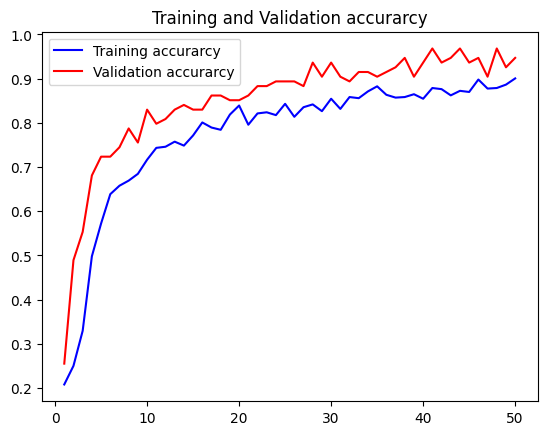

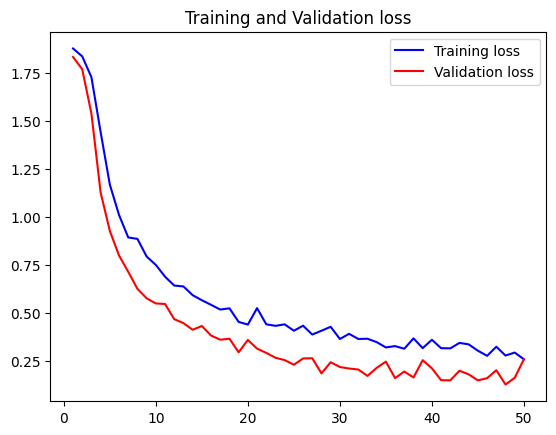

In [37]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
#Train and validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure() # to plot new figure
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [38]:
model.save("modelfinall")

INFO:tensorflow:Assets written to: modelfinall\assets


INFO:tensorflow:Assets written to: modelfinall\assets


In [39]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')

3/3 [==============================] - 0s 8ms/step - loss: 46.9775 - accuracy: 0.8830
Test Accuracy: 0.8829787373542786


1/1 [==============================] - 0s 52ms/step
Anger: 99.91%
Contempt: 0.00%
Disgust: 0.07%
Fear: 0.00%
Happy: 0.00%
Sadness: 0.03%
Surprise: 0.00%


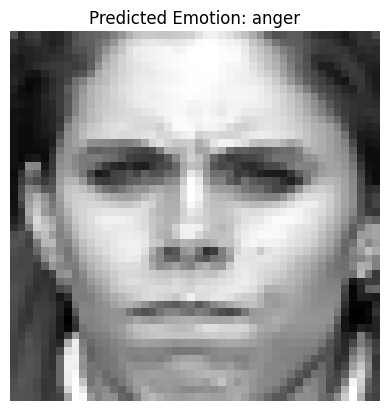

In [42]:
import PIL 
model = tf.keras.models.load_model('modelfinall')
emotion_labels = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']
image_path = r'mmdata/test/anger/S032_003_00000016.png' 
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(48, 48))  
img_array = tf.keras.preprocessing.image.img_to_array(img) 
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension 
img_array = img_array / 255.0  # Normalize pixel values 
predictions = model.predict(img_array) 
predicted_class_index = np.argmax(predictions) 
labels = emotion_labels  
predicted_emotion = emotion_labels[predicted_class_index] 
for label, score in zip(emotion_labels, predictions[0]):     
     print(f"{label.capitalize()}: {score * 100:.2f}%") 
plt.imshow(img, interpolation='nearest') 
plt.title(f'Predicted Emotion: {predicted_emotion}') 
plt.axis('off') 
plt.show()

import cv2
import numpy as np
import tensorflow as tf

# Load your trained model
model = tf.keras.models.load_model('modelfinall')  # Assuming this is your trained emotion recognition model

# Function to predict emotion from an image
def predict_emotion(img):
    # Preprocess the image (resize, normalize, etc.) similarly to how you did for test images
    img = cv2.resize(img, (48, 48))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)

    # Perform emotion prediction
    predictions = model.predict(img)
    return predictions

# Open the laptop camera
cap = cv2.VideoCapture(0)  # 0 for default camera, you can change it if you have multiple cameras

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Perform face detection on the frame
    # Replace this part with your preferred face detection method (using OpenCV or a face detection model)
    # For example, you can use OpenCV's haarcascade for face detection:
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    # For demo purposes, let's assume face detection returns a single face in the frame
    # If you're using a different face detection method, replace this assumption accordingly
    # Perform emotion prediction only if a face is detected
    if len(faces) > 0:
        # Get the detected face region
        x, y, w, h = faces[0]
        face_roi = frame[y:y + h, x:x + w]

        # Predict emotion using the detected face
        predictions = predict_emotion(face_roi)

        # Get the predicted emotion label
        labels = label
        predicted_class_index = np.argmax(predictions)
        predicted_emotion = labels[predicted_class_index]

        # Display the predicted emotion on the frame
        cv2.putText(frame, f"Emotion: {predicted_emotion}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    # Display the frame
    cv2.imshow('Emotion Recognition', frame)
    
    # Press 'q' to exit the video stream
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()
